In [87]:
# library loading
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import warnings

%matplotlib inline
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["axes.grid"] = True
plt.rcParams["font.family"] = "D2Coding"
warnings.filterwarnings(action="ignore")

In [2]:
os.listdir()

['iris.ipynb',
 '.ipynb_checkpoints',
 'iris.data',
 '__pycache__',
 'iris.py',
 'iris.names']

In [3]:
with open("./iris.names","r") as fopen:
    iris_names = fopen.read()
print(iris_names)

1. Title: Iris Plants Database
	Updated Sept 21 by C.Blake - Added discrepency information

2. Sources:
     (a) Creator: R.A. Fisher
     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
     (c) Date: July, 1988

3. Past Usage:
   - Publications: too many to mention!!!  Here are a few.
   1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
      Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
      to Mathematical Statistics" (John Wiley, NY, 1950).
   2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
      (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
      Structure and Classification Rule for Recognition in Partially Exposed
      Environments".  IEEE Transactions on Pattern Analysis and Machine
      Intelligence, Vol. PAMI-2, No. 1, 67-71.
      -- Results:
         -- very low misclassification rates (0% for t

In [4]:
iris = pd.read_csv("./iris.data", names=["sepal_length","sepal_width","petal_length","petal_width","class"])

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


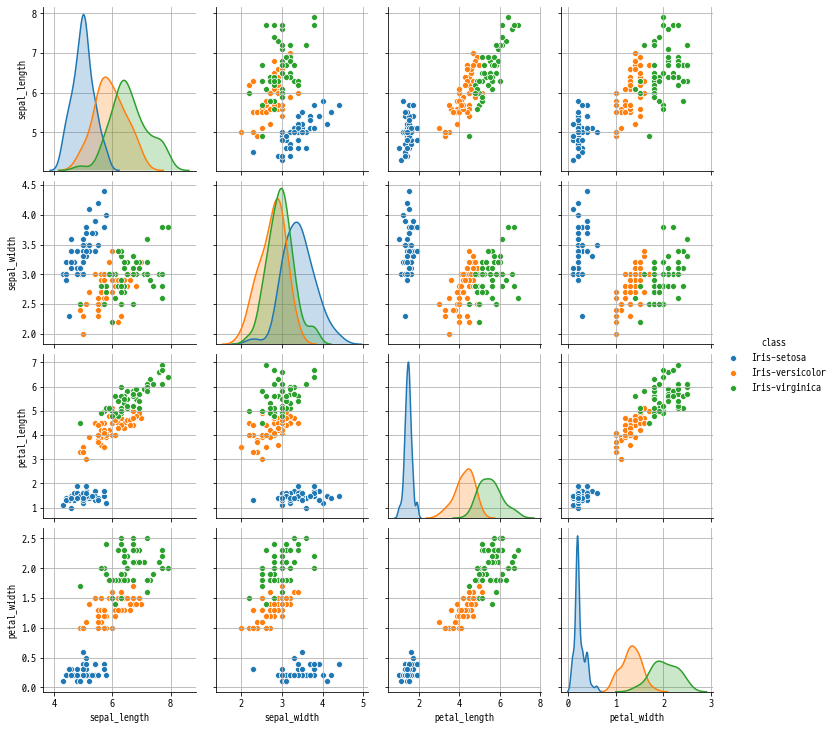

In [8]:
sns.pairplot(data=iris, hue="class")

In [48]:
lm = LogisticRegression()
train, test = train_test_split(iris, train_size=0.7)

lm.fit(X=train.iloc[:, 0:4], y=train.iloc[:, 4])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
lm.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [57]:
lm.coef_

array([[-0.41172589,  0.73372835, -2.27237394, -0.99689529],
       [ 0.55343915, -0.38534765, -0.11211637, -0.9242132 ],
       [-0.14171326, -0.3483807 ,  2.38449031,  1.92110848]])

In [76]:
lm.predict(test.iloc[:, 0:4])

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [82]:
lm.predict(test.iloc[:, 0:4]) == np.array(test.iloc[:, 4])

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True])

In [86]:
#logistics regression : 91% accurary
lm.score(X=test.iloc[:, 0:4], y=test.iloc[:, 4])

0.9111111111111111

In [91]:
svc = SVC()
svc.fit(X=train.iloc[:, 0:4], y=train.iloc[:, 4])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [92]:
svc.coef0

0.0

In [98]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [99]:
svc.kernel

'rbf'

In [101]:
svc.decision_function_shape

'ovr'

In [110]:
svc.dual_coef_

array([[ 1.        ,  0.77185263,  0.6768721 ,  0.2533561 ,  1.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -1.        ,
        -1.        , -0.        , -0.        , -1.        , -0.        ,
        -0.        , -0.70208083, -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -1.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.24444104, -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.75915171],
       [ 1.        ,  0.38228816,  0.        ,  0.62130459,  0.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  1.        ,
         1.        ,  0.     